In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

data_path = "../../data/combined_sample_data.xlsx"
combined_df = pd.read_excel(data_path, sheet_name="SampleData", index_col="SampleID")
metabolite_list = combined_df.columns[8:]

In [2]:
# Get list of metabolites for Subject1
subject1_df = combined_df[combined_df['Subject'] == "Subject1"]
subject1_df = subject1_df[subject1_df['TimeOfDay'] != 4]

diurnal_count = 0
alpha = 0.05
num_metabolites = len(metabolite_list)
lr_info_dict = {}
subject1_diurnal_list = []
for metabolite in metabolite_list:
    log2_metabolite = np.log2(subject1_df[metabolite])
    lr_info = pg.linear_regression(subject1_df['TimeOfDay'], log2_metabolite)
    lr_pval = lr_info.iloc[1]['pval']
    if lr_pval < alpha :
        diurnal_count += 1
        subject1_diurnal_list.append(metabolite)
    lr_info_dict[metabolite] = {
        'MetaboliteID':metabolite,
        'lr_pval': lr_pval
    }
    #print( metabolite, normal, lr_pval)
print(diurnal_count)

170


In [3]:
subject1_diurnal_list

['2-Deoxypentonic acid ',
 '2-Hydroxy-2-methylbutyric acid 2 TMS',
 '3-(3-Hydroxyphenyl)propanoic acid 2 TMS',
 '3,4-Dihydroxyphenylacetic acid 3 TMS',
 '4-Hydroxy-Hippuric acid 2 TMS',
 '4-Hydroxybenzeneacetic acid 2 TMS',
 '4-O-Feruloylquinic acid 5 TMS',
 '5-O-Feruloylquinic acid 5 TMS',
 '6-Biopterin 4 TMS',
 '7-Methylguanine 2 TMS',
 'Adenine 2 TMS',
 'Adenosine 4 TMS',
 'Carbohydrate 1',
 'Carbohydrate 20 ',
 'Carbohydrate 2',
 'Carbohydrate 22 ',
 'Carbohydrate 5',
 'Ephedrine 2 TMS',
 'ethyldiethanolamine 2 TMS*',
 'Furoylglycine TMS',
 'Galactose 5 TMS',
 'Galacturonic acid 5 TMS',
 'Gallic acid 4 TMS',
 'Guanine 3 TMS',
 'Hippuric acid TMS',
 'Hydracrylic acid 2 TMS',
 'Hydrocaffeic acid 3 TMS',
 'Lactose 8 TMS',
 'Orotic acid 3 TMS',
 'Quininic acid 5 TMS',
 'Quinolinic acid 2 TMS',
 'Tryptophan 3 TMS',
 'unknown RT 10.02501',
 'unknown RT 10.337359',
 'unknown RT 10.367138',
 'unknown RT 10.43031',
 'unknown RT 10.797935',
 'unknown RT 10.896843',
 'unknown RT 11.185023',
 

In [4]:
# Get list of metabolites for Subject2
subject2_df = combined_df[combined_df['Subject'] == "Subject2"]
subject2_df = subject2_df[subject2_df['TimeOfDay'] != 4]

diurnal_count = 0
alpha = 0.05
num_metabolites = len(metabolite_list)
lr_info_dict = {}
subject2_diurnal_list = []
for metabolite in metabolite_list:
    log2_metabolite = np.log2(subject2_df[metabolite])
    lr_info = pg.linear_regression(subject2_df['TimeOfDay'], log2_metabolite)
    lr_pval = lr_info.iloc[1]['pval']
    if lr_pval < alpha :
        diurnal_count += 1
        subject2_diurnal_list.append(metabolite)
    lr_info_dict[metabolite] = {
        'MetaboliteID':metabolite,
        'lr_pval': lr_pval
    }
    #print( metabolite, normal, lr_pval)
print(diurnal_count)

181


In [5]:
subject2_diurnal_list

['2-Hydroxy-2-methylbutyric acid 2 TMS',
 '4-Hydroxy-Hippuric acid 2 TMS',
 '4-Hydroxybenzeneacetic acid 2 TMS',
 '4-O-Feruloylquinic acid 5 TMS',
 '6-Biopterin 4 TMS',
 'Adenosine 5-s-methyl-5-thio-N 3 TMS',
 'Allocholic acid 4 TMS',
 'Aminomalonic acid 3 TMS',
 'Arginine 3 TMS',
 'Carbohydrate 17 ',
 'Carbohydrate 20 ',
 'Carbohydrate 4',
 'Carbohydrate 7 ',
 'Carbohydrate 8 ',
 'Eugenol TMS',
 'Furoylglycine TMS',
 'Galactose 5 TMS',
 'Gallic acid 4 TMS',
 'Glutamine 3 TMS',
 'Guanine 3 TMS',
 'Hippuric acid TMS',
 'Hydracrylic acid 2 TMS',
 'Hydrocaffeic acid 3 TMS',
 'Hydroxy-methylglutaric acid 3 TMS',
 'Lactose 8 TMS',
 'Methyl-Cysteine 2 TMS',
 'Methylmaleic acid 2 TMS*',
 'N-Acetyltyrosine 2 TMS',
 'Orotic acid 3 TMS',
 'Phenoxyacetic acid TMS',
 'Pyrogallol 3 TMS',
 'Ritalinic acid 2 TMS*',
 'Scyllo-Inositol 6 TMS',
 'Tiglylglycine TMS',
 'Tryptophan 3 TMS',
 'Tyrosine 3 TMS',
 'unknown RT 10.224741',
 'unknown RT 10.337359',
 'unknown RT 10.367138',
 'unknown RT 10.43031',
 

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
%matplotlib inline

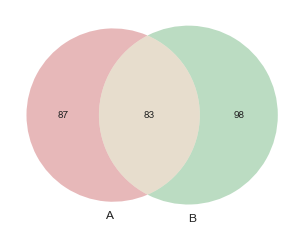

In [7]:
# Second way

f = plt.figure()
venn2([set(subject1_diurnal_list), set(subject2_diurnal_list)])
plt.show()

f.savefig("TimeOfDay_venn.pdf", bbox_inches='tight', format="pdf")


In [8]:
set(subject1_diurnal_list).intersection(set(subject2_diurnal_list))

{'2-Hydroxy-2-methylbutyric acid 2 TMS',
 '4-Hydroxy-Hippuric acid 2 TMS',
 '4-Hydroxybenzeneacetic acid 2 TMS',
 '4-O-Feruloylquinic acid 5 TMS',
 '6-Biopterin 4 TMS',
 'Carbohydrate 20 ',
 'Furoylglycine TMS',
 'Galactose 5 TMS',
 'Gallic acid 4 TMS',
 'Guanine 3 TMS',
 'Hippuric acid TMS',
 'Hydracrylic acid 2 TMS',
 'Hydrocaffeic acid 3 TMS',
 'Lactose 8 TMS',
 'Orotic acid 3 TMS',
 'Tryptophan 3 TMS',
 'Vanillylmandelic acid 3 TMS',
 'Xanthine 3 TMS',
 'Xanthurenic acid 3 TMS',
 'unknown RT 10.337359',
 'unknown RT 10.367138',
 'unknown RT 10.43031',
 'unknown RT 10.797935',
 'unknown RT 11.440631',
 'unknown RT 12.184231',
 'unknown RT 12.267913',
 'unknown RT 12.377649',
 'unknown RT 12.54183',
 'unknown RT 14.49924',
 'unknown RT 14.585312',
 'unknown RT 14.623038',
 'unknown RT 14.685699',
 'unknown RT 14.876962',
 'unknown RT 14.966518',
 'unknown RT 15.226943',
 'unknown RT 15.71147',
 'unknown RT 15.785943',
 'unknown RT 16.30547',
 'unknown RT 16.40641',
 'unknown RT 16.41